In [6]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.1.3

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [4]:
raw_data = load_boston()

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

In [5]:
print(raw_data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [7]:
print(raw_data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(raw_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
boston_data = pd.DataFrame(raw_data['data'], columns=raw_data['feature_names'])

In [11]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
data = pd.DataFrame(np.c_[boston_data['CRIM'], boston_data['AGE'], 
                         boston_data['NOX'], boston_data['LSTAT']], columns=['CRIM', 'AGE', 'NOX', 'LSTAT'])

In [17]:
data.shape

(506, 4)

In [18]:
X_train = data[:-100]
Y_train = raw_data.target[:-100]
X_test = data[-100:]
Y_test = raw_data.target[-100:]

In [19]:
u = np.mean(data, axis = 0)
std = np.std(data, axis = 0)

In [20]:
X_train = (X_train-u)/std
X_test = (X_test - u)/std

In [21]:
X_train = X_train.values
X_test = X_test.values

In [22]:
X_train.shape, X_test.shape

((406, 4), (100, 4))

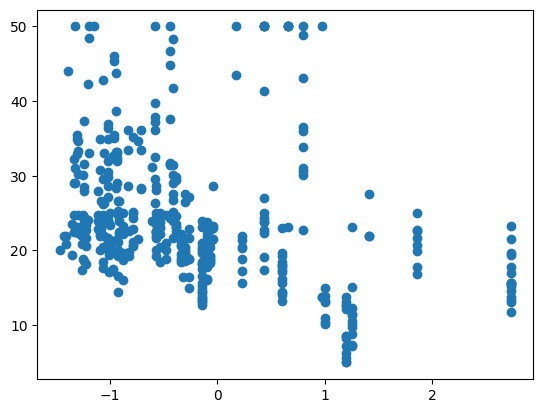

In [26]:
plt.scatter(X_train[:, 2], Y_train)

In [27]:
ones = np.ones((X_train.shape[0], 1))

In [29]:
ones.shape

(406, 1)

In [30]:
X_train = np.hstack((ones, X_train))

In [31]:
X_train

array([[ 1.        , -0.41978194, -0.12001342, -0.14421743, -1.0755623 ],
       [ 1.        , -0.41733926,  0.36716642, -0.74026221, -0.49243937],
       [ 1.        , -0.41734159, -0.26581176, -0.74026221, -1.2087274 ],
       ...,
       [ 1.        ,  2.46573659,  0.9752522 ,  1.19472373,  0.99760795],
       [ 1.        ,  4.41236983,  0.59831014,  1.19472373,  2.06433044],
       [ 1.        ,  7.48364564,  1.11749449,  1.19472373,  1.4475658 ]])

In [37]:
def hypothesis(X, theta):
    y = 0
    for i in range(X.shape[0]):
        y += theta[i]*X[i]
    return y

In [38]:
def cost(X, Y, theta):
    error = 0
    
    for i in range(X.shape[0]):
        y_p = hypothesis(X[i], theta)
        
        error += (y_p - Y[i])**2
        
    return error/X.shape[0]

In [39]:
def gradient(X, Y, theta):
    grad = np.zeros((X.shape[1], ))
    
    for j in range(X.shape[1]):
        for i in range(X.shape[0]):
            y_p = hypothesis(X[i], theta)

            grad[j] += (y_p - Y[i])*X[i, j]
        
    return grad/X.shape[0]

In [40]:
def gradient_descent(X, Y):
    theta = np.zeros((X.shape[1], ))
    
    max_epochs = 1000
    epoch_loss = []
    lr = 0.03
    
    for i in range(max_epochs):
        grad = gradient(X, Y, theta)
        
        loss = cost(X, Y, theta)
        epoch_loss.append(loss)
        
        for j in range(X.shape[1]):
            theta[j] = theta[j] - lr*grad[j]
        
    return theta, epoch_loss

In [41]:
theta, cost = gradient_descent(X_train, Y_train)

In [42]:
cost

[666.9598768472904,
 618.2916568437407,
 574.4433411664456,
 534.8329113102317,
 498.9572002785753,
 466.3806265441915,
 436.7255732465067,
 409.6641703000931,
 384.91127289739677,
 362.21846040010746,
 341.3689056105744,
 322.1729865659184,
 304.46453187219464,
 288.0976066790867,
 272.9437601003194,
 258.8896665633028,
 245.8351035232899,
 233.6912164581287,
 222.37902928708735,
 211.8281645167767,
 201.9757426668024,
 192.7654350021126,
 184.14664741272762,
 176.0738165323617,
 168.50580195861278,
 161.40536079985063,
 154.73869278808147,
 148.47504591441566,
 142.5863740081727,
 137.04703892950155,
 131.83355111052876,
 126.92434308859436,
 122.29957145023171,
 117.94094326588345,
 113.83156365970882,
 109.95580164054222,
 106.29917173128968,
 102.84822928518246,
 99.59047767721947,
 96.51428581532922,
 93.60881463474735,
 90.86395142625524,
 88.27025100899317,
 85.81888289547797,
 83.50158371364122,
 81.31061425104254,
 79.23872057237418,
 77.27909873505236,
 75.42536269089028,
 7

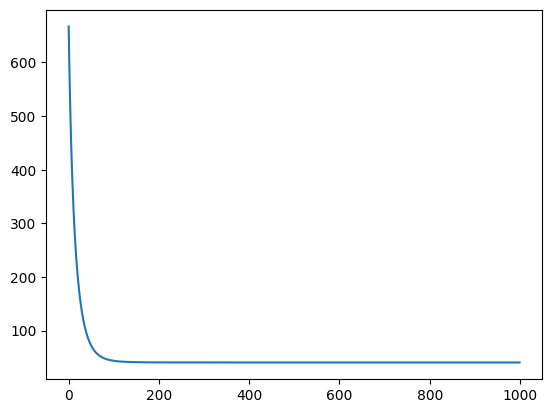

In [43]:
plt.plot(cost)

In [44]:
theta

array([ 2.29053713e+01, -5.06387929e-01,  1.56203226e+00,  1.93399339e-02,
       -7.69170961e+00])

In [48]:
ones = np.ones((X_test.shape[0], 1))

In [49]:
X_test = np.hstack((ones, X_test))

In [50]:
def r2_score(y_t, y_p):
    
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_p.mean())**2)
    
    return (1 - num/den)

In [51]:
y_p = []
for i in X_test:
    pred = hypothesis(i, theta)
    y_p.append(pred)

In [52]:
print(r2_score(Y_test, np.array(y_p)))

0.09473373715475886


In [53]:
for i in range(len(y_p)):
    print(y_p[i], Y_test[i])

12.13809953769354 11.9
24.74098025385964 27.9
9.496369086669745 17.2
16.336004863280458 27.5
24.599383454446716 15.0
14.806272638556685 17.2
0.3477332761657195 17.9
15.174714773988123 16.3
-4.037553414444044 7.0
6.140135851537945 7.2
9.571225609523875 7.5
7.670126330252518 10.4
11.961520792887253 8.8
12.014219939677703 8.4
21.685806168299692 16.7
20.931115943937396 14.2
21.914953617222704 20.8
12.162168115841876 13.4
17.85830887214871 11.7
11.039999084335095 8.3
18.634160093006088 10.2
19.469197375373778 10.9
13.673909044138755 11.0
11.769649700584308 9.5
18.21943757079829 14.5
16.372130012050736 14.1
23.7610200994261 16.1
20.043531828517025 14.3
21.078974456711297 11.7
12.490274893916023 13.4
17.854007644150435 9.6
9.124917578267715 8.7
0.379351143695569 8.4
12.976173362481447 12.8
12.976967270161921 10.5
16.762493053303377 17.1
20.316206513993734 18.4
17.626119652011006 15.4
11.943959708172304 10.8
11.76467245805987 11.8
18.78579015156482 14.9
20.038121706906757 12.6
18.3632497908202

In [54]:
from sklearn import metrics

In [57]:
print(f'MAE: {metrics.mean_absolute_error(y_pred=y_p, y_true=Y_test)}')
print(f'MSE: {metrics.mean_squared_error(y_pred=y_p, y_true=Y_test)}')
print(f'RMSE: {(metrics.mean_squared_error(y_pred=y_p, y_true=Y_test)**0.5)}')

MAE: 3.9861876741138733
MSE: 26.400847052281307
RMSE: 5.138175459468206
